### Implement a simple deep neural network for solving the polynomial y = 5x^3 - 8x^2 - 7x + 1 with the following specifications:

- **Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters.**
- **Generate training samples within the range of -20 to +20. Use the appropriate method for normalizing the training data in the range of -1 to +1.**
- **Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with and appropriate number of epochs.**
- **Display the training accuracy vs validation accuracy and training error vs validation error curves.**
- **After training, use the test data for prediction and display the prediction accuracy vs true levels of the test data.**



> ### Importing the Libraries



In [3]:
from keras.layers import Input, Dense
from keras.models import Model
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

### Generating the Dataset

In [4]:
x = np.random.randint(-20, 20, 10000)
y = 5 * x**3 - 8 * x**2 - 7 * x + 1

x_data = (2 * (x - np.min(x)) / (np.max(x) - np.min(x))) - 1
y_data = (2 * (y - np.min(y)) / (np.max(y) - np.min(y))) - 1

### Spliting the Dataset into Training & Testing

In [5]:
data_len = len(x_data)
x_train, y_train = x_data[:int(data_len*0.9)] , y_data[:int(data_len*0.9)]
x_validation, y_validation = x_data[int(data_len*0.9):int(data_len*0.95)] , y_data[int(data_len*0.9):int(data_len*0.95)]
x_test , y_test = x_data[int(data_len*0.95):], y_data[int(data_len*0.95):]

### Plotting the Dataset

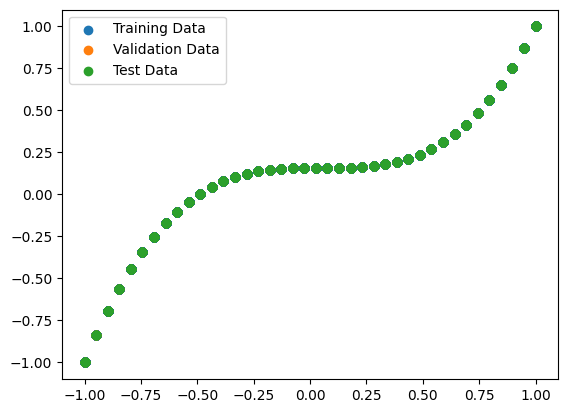

In [6]:
plt.scatter(x_train, y_train, label = "Training Data")
plt.scatter(x_validation, y_validation, label = "Validation Data")
plt.scatter(x_test, y_test, label = "Test Data")
plt.legend()
plt.show()

### Building the Model

In [7]:
inputs = Input((1,))
x = Dense(32, activation = "relu")(inputs)
x = Dense(64, activation = "relu")(x)
x = Dense(128, activation = "relu")(x)
outputs = Dense(1, name = "Output_Layer")(x)

model = Model(inputs, outputs, name = "Deep_Neural_Network")
model.summary()

Model: "Deep_Neural_Network"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 dense (Dense)               (None, 32)                64        
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 Output_Layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 10625 (41.50 KB)
Trainable params: 10625 (41.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Training the Model

In [8]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = [tf.keras.metrics.R2Score(name='accuracy')])
trained_model = model.fit(x_train, y_train, epochs = 50,  validation_data=(x_validation, y_validation), verbose = 0)
history = trained_model.history

### Plotting the Training & Validation Accuracy

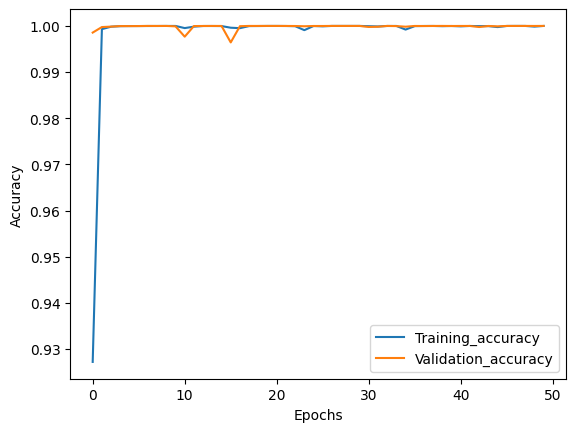

In [9]:
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_accuracy', 'Validation_accuracy'])
plt.show()

### Plotting the Training & Validation Loss

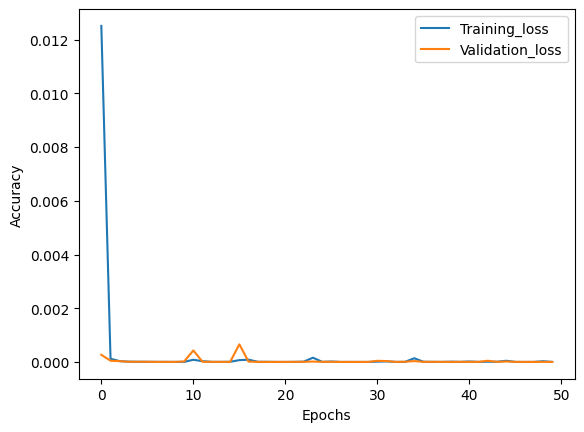

In [10]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training_loss', 'Validation_loss'])

### Evaluating the Model

In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss :.7f}")
print(f"Test Accuracy: {test_accuracy*100 :.5f}%")

16/16 [==============================] - 0s 2ms/step - loss: 4.3527e-08 - accuracy: 1.0000
Test Loss: 0.0000000
Test Accuracy: 99.99997%


### Making Predictions

In [12]:
predictions = model.predict(x_test)

16/16 [==============================] - 0s 2ms/step


### Display prediction accuracy vs true levels

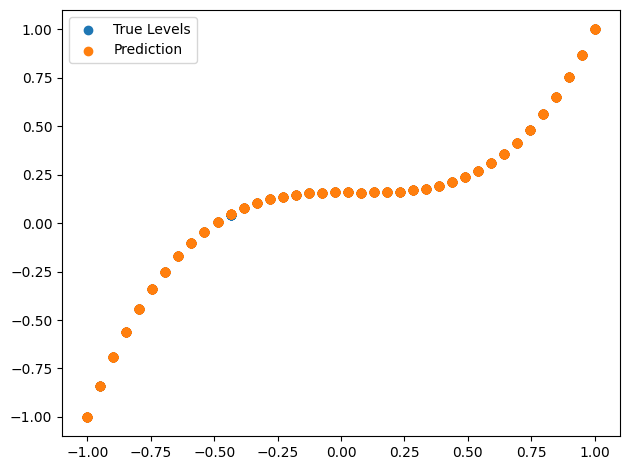

In [13]:
plt.scatter(x_test,y_test)
plt.scatter(x_test, predictions)
plt.legend(['True Levels','Prediction'])
plt.tight_layout()
plt.show()